In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
uwind_datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Surface_wind_speed_(U).parquet.gzip")
vwind_datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Surface_wind_speed_(V).parquet.gzip")

uwind_df = pd.read_parquet(uwind_datafile_path)
vwind_df = pd.read_parquet(vwind_datafile_path)

uwind_df.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,-1.553505,-1.494480,-1.435321,-1.376051,-1.316692,-1.257267,-1.197800,-1.138312,-1.078828,-1.019370,...,-2.131399,-2.074956,-2.018154,-1.961016,-1.903564,-1.845820,-1.787807,-1.729546,-1.671060,-1.612372
-88.3125,-3.071361,-3.004896,-2.925712,-2.806527,-2.686621,-2.566039,-2.444828,-2.323033,-2.200703,-2.077884,...,-3.703798,-3.642854,-3.581481,-3.519701,-3.457538,-3.395017,-3.332161,-3.268995,-3.203725,-3.137645
-87.1875,-3.430159,-3.319293,-3.208050,-3.096473,-2.984605,-2.879339,-2.784328,-2.688862,-2.592976,-2.496708,...,-4.300293,-4.241551,-4.182878,-4.124296,-4.065828,-3.977353,-3.869006,-3.760071,-3.650590,-3.540605
-86.0625,-3.664065,-3.579432,-3.494730,-3.409991,-3.325248,-3.240533,-3.141361,-3.009082,-2.876466,-2.777613,...,-4.470154,-4.408735,-4.329922,-4.250715,-4.168598,-4.085059,-4.001257,-3.917225,-3.832994,-3.748596
-84.9375,-3.747794,-3.650377,-3.563831,-3.477637,-3.391827,-3.306436,-3.221495,-3.137036,-3.053092,-2.969695,...,-4.713101,-4.618124,-4.522872,-4.427381,-4.331687,-4.235827,-4.139837,-4.043754,-3.947615,-3.848109


In [3]:
vwind_df.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,-3.707654,-3.738854,-3.770414,-3.802322,-3.834565,-3.867131,-3.900007,-3.933181,-3.966640,-4.000370,...,-3.418009,-3.444975,-3.472414,-3.500316,-3.528670,-3.557464,-3.586689,-3.616331,-3.646380,-3.676825
-88.3125,-4.479798,-4.535901,-4.585217,-4.613042,-4.640457,-4.667449,-4.694010,-4.720129,-4.745796,-4.771000,...,-3.629021,-3.725975,-3.822724,-3.919233,-4.015463,-4.111378,-4.206941,-4.302115,-4.367574,-4.423682
-87.1875,-4.680297,-4.773330,-4.865857,-4.957841,-5.049250,-5.119875,-5.159104,-5.198517,-5.238100,-5.277837,...,-3.793204,-3.875365,-3.957123,-4.038447,-4.119307,-4.208800,-4.303823,-4.398521,-4.492857,-4.586794
-86.0625,-4.631037,-4.679134,-4.727615,-4.776462,-4.825655,-4.875175,-4.926679,-4.982299,-5.038243,-5.078435,...,-3.971389,-4.063947,-4.175187,-4.286323,-4.351538,-4.396950,-4.442854,-4.489233,-4.536067,-4.583342
-84.9375,-4.190506,-4.217079,-4.249282,-4.282571,-4.316932,-4.352353,-4.388820,-4.426319,-4.464836,-4.504355,...,-3.792249,-3.832526,-3.873674,-3.915677,-3.958519,-4.002185,-4.046657,-4.091918,-4.137952,-4.166164


In [4]:
wind_speed = np.stack((uwind_df.to_numpy(), vwind_df.to_numpy()), axis=-1)
print(wind_speed.shape)
wind_speed

(160, 320, 2)


array([[[-1.5535046, -3.7076538],
        [-1.4944799, -3.7388542],
        [-1.435321 , -3.7704144],
        ...,
        [-1.7295461, -3.6163309],
        [-1.6710603, -3.6463804],
        [-1.6123723, -3.6768253]],

       [[-3.0713606, -4.479798 ],
        [-3.0048957, -4.5359006],
        [-2.9257116, -4.5852175],
        ...,
        [-3.2689948, -4.302115 ],
        [-3.203725 , -4.3675737],
        [-3.1376455, -4.4236817]],

       [[-3.4301586, -4.6802974],
        [-3.3192925, -4.7733297],
        [-3.2080498, -4.8658566],
        ...,
        [-3.760071 , -4.398521 ],
        [-3.6505902, -4.492857 ],
        [-3.540605 , -4.5867944]],

       ...,

       [[ 1.1426857, -3.6903129],
        [ 1.1322612, -3.780997 ],
        [ 1.1210209, -3.8719256],
        ...,
        [ 1.0159048, -3.3753207],
        [ 1.067036 , -3.4822576],
        [ 1.1196237, -3.5902894]],

       [[ 1.2975432, -4.0458374],
        [ 1.217648 , -4.090649 ],
        [ 1.137874 , -4.135479 ],
        .

In [5]:
def abs_val(a):
    return np.sqrt(np.square(a).sum())

abs_wind_arr = np.apply_along_axis(func1d=abs_val, axis=-1, arr=wind_speed)
print(abs_wind_arr.shape)
abs_wind_arr

abs_wind_df = pd.DataFrame(data=abs_wind_arr, index=uwind_df.index, columns=uwind_df.columns)
abs_wind_df.head()

(160, 320)


,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,4.019959,4.026475,4.034374,4.043658,4.054327,4.066377,4.079801,4.094590,4.110730,4.128205,...,4.028107,4.021604,4.016293,4.012206,4.009373,4.007818,4.007566,4.008638,4.011051,4.014821
-88.3125,5.431560,5.440937,5.439118,5.399700,5.362068,5.326316,5.292534,5.260808,5.231221,5.203849,...,5.185356,5.210880,5.238342,5.267701,5.298916,5.331938,5.366716,5.403195,5.416600,5.423447
-87.1875,5.802687,5.813982,5.828219,5.845369,5.865389,5.873986,5.862494,5.852739,5.844760,5.838588,...,5.734189,5.745365,5.758063,5.772251,5.787888,5.790797,5.787236,5.786633,5.789004,5.794356
-86.0625,5.905241,5.891233,5.879071,5.868784,5.860394,5.853921,5.842971,5.820471,5.801547,5.788406,...,5.979482,5.996049,6.015016,6.036650,6.026034,6.001739,5.979047,5.958008,5.938665,5.921063
-84.9375,5.621948,5.577545,5.545926,5.516735,5.490027,5.465848,5.444242,5.425246,5.408894,5.395212,...,6.049337,6.001277,5.954975,5.910518,5.867997,5.827497,5.789100,5.752890,5.718943,5.671408


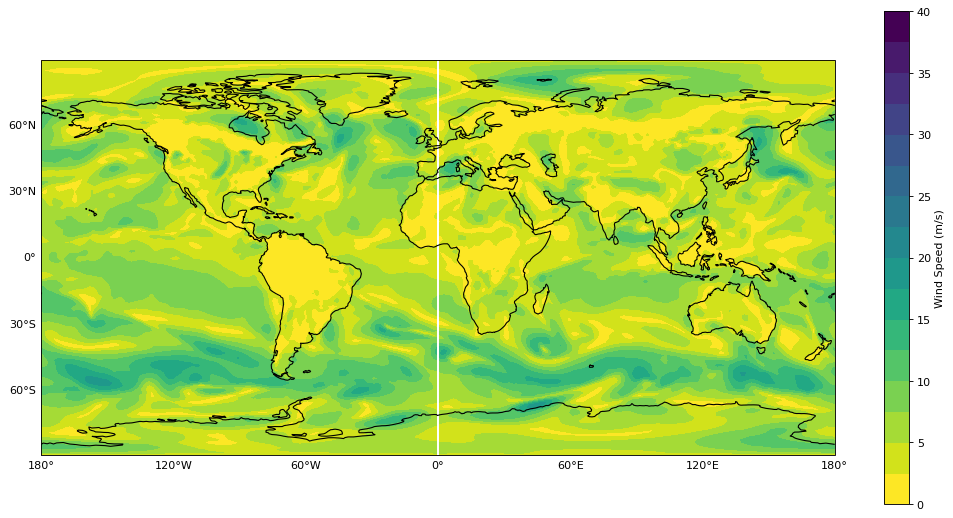

In [6]:
grid_mesh = np.meshgrid(uwind_df.columns.astype(np.float32).to_numpy(), uwind_df.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = np.arange(0, 41, 2.5)
cmap = cm.viridis_r
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, abs_wind_df, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Wind arrow
# ax.quiver(
#     uwind_df.columns.astype(np.float32).to_numpy(),
#     uwind_df.index.to_numpy(),
#     uwind_df.to_numpy(),
#     vwind_df.to_numpy(),
#     color="red",
#     scale=550,
# )

# Fig Info
cbar.set_label("Wind Speed (m/s)")

plt.show()
plt.close()

In [7]:
data_folder = "/home/akira/Desktop/p-poteka/data/nexra_data/2020/20200304"

import os
from itertools import groupby

filenames = os.listdir(data_folder)

def get_hour(val):
    return int(val[:2])

sorted_filenames = sorted(filenames, key=get_hour)
grouped_filenames = [list(it) for _, it in groupby(sorted_filenames, get_hour)]
grouped_filenames

[['00_Time_accumulated_rainfall_(1hour).parquet.gzip',
  '00_Temperature.png',
  '00_Cumulative_water_vapor_amount.parquet.gzip',
  '00_Pressure.parquet.gzip',
  '00_Pressure.png',
  '00_Cloud_amount.parquet.gzip',
  '00_Surface_wind_speed_(U).png',
  '00_Cumulative_water_vapor_amount.png',
  '00_Sea_level_pressure.parquet.gzip',
  '00_Cloud_amount.png',
  '00_Surface_wind_speed_(U).parquet.gzip',
  '00_Temperature.parquet.gzip',
  '00_Surface_wind_speed_(V).parquet.gzip',
  '00_Sea_level_pressure.png',
  '00_Time_accumulated_rainfall_(1hour).png'],
 ['06_Sea_level_pressure.png',
  '06_Temperature.png',
  '06_Surface_wind_speed_(V).parquet.gzip',
  '06_Cumulative_water_vapor_amount.parquet.gzip',
  '06_Time_accumulated_rainfall_(1hour).parquet.gzip',
  '06_Pressure.png',
  '06_Surface_wind_speed_(V).png',
  '06_Time_accumulated_rainfall_(1hour).png',
  '06_Sea_level_pressure.parquet.gzip',
  '06_Cloud_amount.parquet.gzip',
  '06_Pressure.parquet.gzip',
  '06_Temperature.parquet.gzip',
